In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
import imutils as imutils
from matplotlib.patches import Circle 


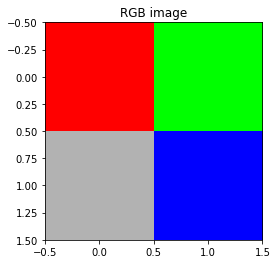

In [2]:
## Exercise 1
img_bgr = np.zeros((2, 2, 3), np.uint8)
img_bgr[0][0] = np.array([255, 0, 0], np.uint8)
img_bgr[0][1] = np.array([0, 255, 0], np.uint8)
img_bgr[1][0] = np.array([255*0.7, 255*0.7, 255*0.7], np.uint8)
img_bgr[1][1] = np.array([0, 0, 255], np.uint8)


plt.figure()
plt.title('RGB image')
imgplot = plt.imshow(img_bgr, cmap="gray") 



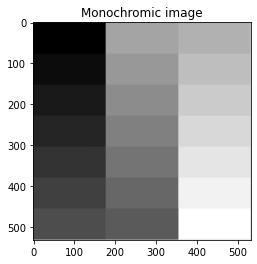

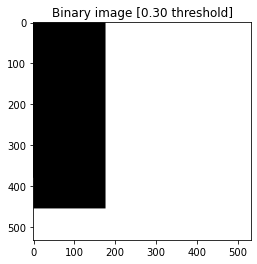

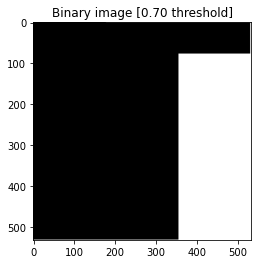

In [3]:
## Exercise 2
img = cv.imread('Gray21.tif')
plt.figure()
plt.title('Monochromic image')
imgplot = plt.imshow(img, cmap="gray") 


thereshold = np.uint(0.3*255);
ret, binarized = cv.threshold(img, thereshold, 255, cv.THRESH_BINARY)
plt.figure()
plt.title('Binary image [0.30 threshold]')
imgplot = plt.imshow(binarized, cmap="gray")

thereshold = np.uint(0.7*255);
ret, binarized = cv.threshold(img, thereshold, 255, cv.THRESH_BINARY)
plt.figure()
plt.title('Binary image [0.70 threshold]')
imgplot = plt.imshow(binarized, cmap="gray")


''

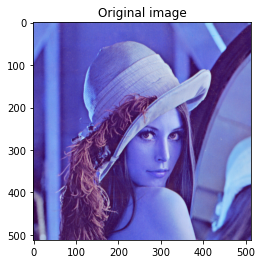

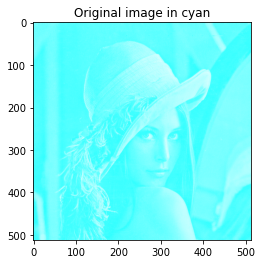

In [4]:
## Exercise 3
img = cv.imread('Lena.tif', cv.IMREAD_UNCHANGED)
plt.figure()
plt.title('Original image')
imgplot = plt.imshow(img) 

img_cyan = img.copy()
img_cyan[:, :, (2,1)] = 255
plt.figure()
plt.title('Original image in cyan')
plt.imshow(img_cyan) 
;

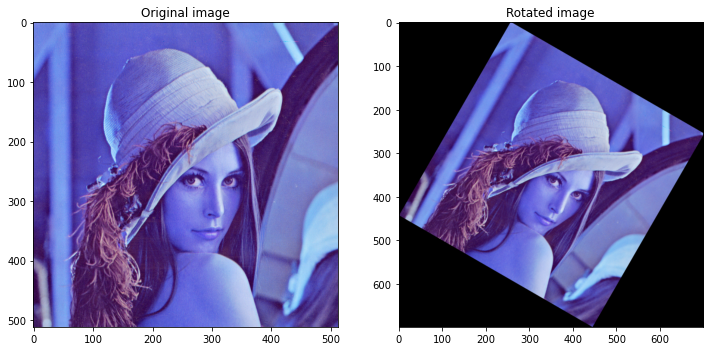

In [5]:
## Exercise 4
img = cv.imread('Lena.tif')

img_rotate = imutils.rotate(img, 30)
rotated_bound_img = imutils.rotate_bound(img, 30)


plt.figure(figsize=[12,12])
plt.subplot(1,2,1)
plt.title('Original image')
imgplot = plt.imshow(img) 
plt.subplot(1,2,2)
plt.title('Rotated image')
imgplot = plt.imshow(rotated_bound_img) 


In [6]:
## Exercise 5



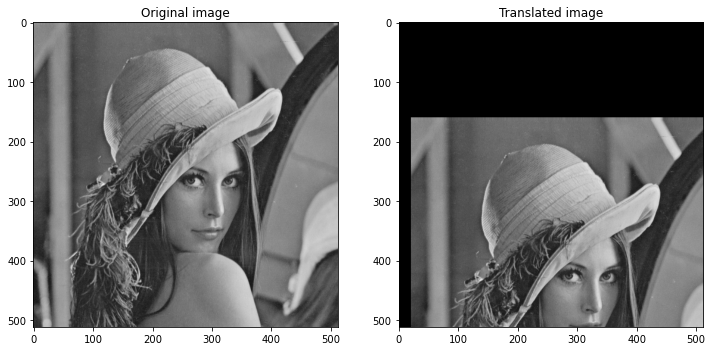

In [7]:
## Exercise 6
img = cv.imread('Lena_mono.tif')
height, width = img.shape[:2]


translate_x = 20
translate_y = 160
T = np.float32([[1, 0, translate_x], [0, 1, translate_y]]) 
img_translated = cv.warpAffine(img, T, (width, height))


plt.figure(figsize=[12,12])
plt.subplot(1,2,1)
plt.title('Original image')
imgplot = plt.imshow(img) 
plt.subplot(1,2,2)
plt.title('Translated image')
imgplot = plt.imshow(img_translated) 




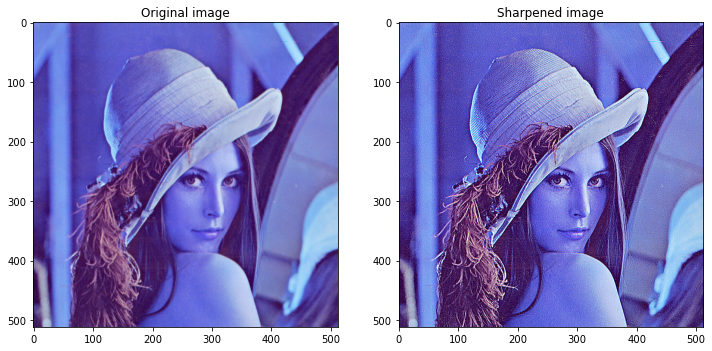

In [8]:
## Exercise 7
img = cv.imread('Lena.tif', cv.IMREAD_COLOR)


kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharp = cv.filter2D(img, -1, kernel_sharp)


plt.figure(figsize=[12,12])
plt.subplot(1,2,1)
plt.title('Original image')
imgplot = plt.imshow(img) 
plt.subplot(1,2,2)
plt.title('Sharpened image')
imgplot = plt.imshow(img_sharp) 

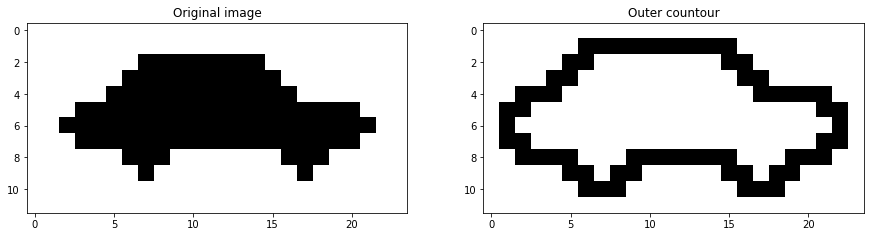

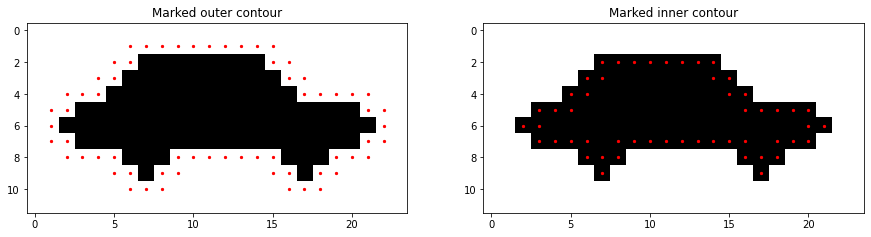

In [27]:
## Exercise 8
img = cv.imread('Auto.tif')
thereshold = np.uint(0.1*255);
ret, img = cv.threshold(img, thereshold, 255, cv.THRESH_BINARY)

height, width = img.shape[:2]

SE = np.ones((3, 3), np.uint8)                              # Creating structural element



# Outer
grad_outer = img - cv.erode(img, SE, iterations = 1)
img_outer = cv.bitwise_not(grad_outer)

#Inner
grad_inner = img + cv.dilate(img, SE, iterations = 1)
img_inner = img - cv.bitwise_not(grad_inner)



# ---------------------------------- plotting
plt.figure(figsize=[15,15])
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(img) 
plt.subplot(1,2,2)
plt.title('Outer countour')
plt.imshow(img_outer) 

plt.figure(figsize=[15,15])
plt.subplot(1,2,1)
plt.title('Marked outer contour')
plt.imshow(img) 
for x in range(len(img)):
    for y in range(len(img[x])):
        if img_outer[x,y].all() == 0:
            plt.scatter(y,x, 5, 'red')

plt.subplot(1,2,2)
plt.title('Marked inner contour')
plt.imshow(img) 
for x in range(len(img)):
    for y in range(len(img[x])):
        if img_inner[x,y].all() == 0:
            plt.scatter(y,x, 5, 'red')
